# Full Experiment Aquisition

In [1]:
from line_profiler import LineProfiler

import ximea_cam_aquire_save as aquire
import run_experiment as runexp
import run_analysis as runana

import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio

import cv2
import schedule
import time

In [2]:
#settings
subject = 'test_subject'
task = 'test_task'
exp = 'exp'
capture_dir = './capture'
analysis_dir = './analysis'
frames = 500

In [4]:
# run experiment
imp.reload(runexp)
imp.reload(aquire)
runexp.run_experiment(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      save_dir=capture_dir,
                      max_frames=frames)

Running an experiment.
Started eyetracking aquisition at 200fps...
Started imu aquisition at 200fps...
Starting scene aquisition at 200fps...
Setting cam exposure to 5.0 ms
ERROR 57: Resource (device) or function locked by mutex
There was an Error. Cleanly Stopping Device Aquisition and closing file.
Recording Timestamp Syncronization Post...


Xi_error: ERROR 1: Invalid handle

Finished PupilLabs Aquisition.
Finished Realsense Aquisition.


In [ ]:
#line profile experiment running
imp.reload(runexp)
lp = LineProfiler()
# lp_wrapper = lp(runexp.run_experiment)
# lp_wrapper(subject_name=subject, 
#                       task_name=task, 
#                       exp_type=exp,
#                       save_dir=capture_dir,
#                       max_frames=frames)
lp_wrapper = lp(runexp.run_ximea_aquisition)
lp_wrapper('./capture/line_profile_test', 200, 1000)
lp.print_stats()

Setting cam exposure to 5.0 ms
Recording Timestamp Syncronization Pre...
Saving Queue Started...
Saving Queue Started...
Saving Queue Started...
**********Sampled to max num frames of 1000
Cleanly Stopping Device Aquisition and closing file.
Recording Timestamp Syncronization Post...
Writing Queue of Timestamps...
Writing Queue of Timestamps...
Waiting for save threads/queues to finish...


Running Frame Analysis...
Mean camera time disparity: 20862.6790 seconds
Mean OS dts: 0.0664 seconds
Mean OD dts: 0.0666 seconds
Mean CY dts: 0.0666 seconds
Mean OS skips: 12.56 frames
Mean OD skips: 13.15 frames
Mean CY skips: 13.15 frames


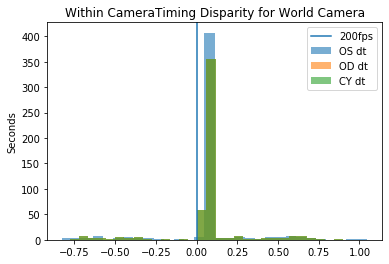

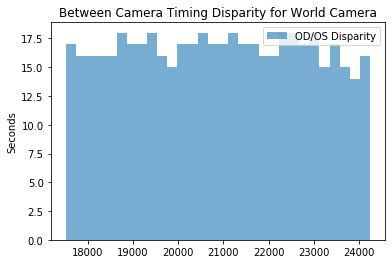

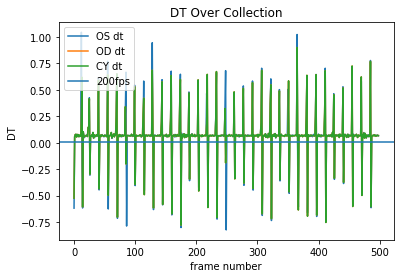

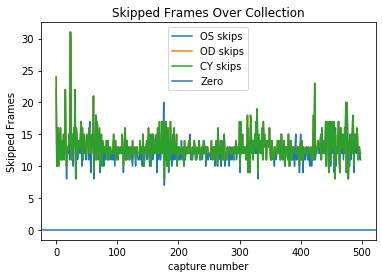

Waiting for frame conversions...
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [6]:
imp.reload(runana)
runana.run_analysis(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      read_dir=capture_dir,
                      save_dir=analysis_dir,
                      run_timestamp_stats=True,
                      run_convert_ims=True
                      )

In [ ]:
im = cv2.imread('./analysis/test_subject/test_task/exp/scene_camera/cam_od/frame_0.png')
plt.imshow(im)
plt.show()
plt.hist(im.flatten())

In [ ]:

f= 'capture/test_subject/test_task/exp/scene_camera/cam_od/frame_0.bin'
a = []
# # for uint16
# with open(f, 'rb') as fn:
#     bss = fn.read(2)
#     while(bss):
#         bss = fn.read(1)
#         bbs = fn.read(1)
#         bs = int.from_bytes(bss,'big')
#         bb = int.from_bytes(bbs,'big')
#         s = 256*bb+bs
#         a.append(s)

# for uint8
with open(f, 'rb') as fn:
    bs = fn.read(1)
    while(bs):
        bs = fn.read(1)
        bs = int.from_bytes(bs,'big')
        a.append(bs)

a = np.array(a)

In [ ]:
plt.hist(np.array(a).flatten(), bins=1000);

In [ ]:
im = a.reshape((1544,2064))
imc = cv2.cvtColor(np.uint16(im), cv2.COLOR_BayerGR2RGB)

In [ ]:
plt.imshow(im)
plt.show()
plt.imshow(imc)
plt.show()

In [ ]:
cv2.imwrite('test.png',imc.astype('float64'))
imcr = cv2.imread('test.png')
plt.imshow(imcr)
plt.show()
imcrw = cv2.balanceWhite(imcr)
plt.imshow(imcrw)
plt.show()


In [ ]:
plt.hist(np.array(imc).flatten(), bins=1000);

In [ ]:
plt.hist(np.array(imc.astype('float64')).flatten(), bins=1000);

In [ ]:
plt.hist(np.array(imcr).flatten(), bins=1000);

In [ ]:
max(np.array(imc).flatten())

In [ ]:
max(np.array(imcr).flatten())